# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**


Student: **Alexey Tyurin**<br>
Group: Oct'22 C Sun - MLS Grp B<br>
Batch: PGP-DSBA-UTA-OCT22-C<br>
Date: 11/27/2022<br>

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

%matplotlib inline


### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

In [3]:
df.tail()

order_id  customer_id                        restaurant_name  \
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week     rating  \
1893        Mexican              22.31         Weekend          5   
1894       American              12.18         Weekend          5   
1895       Japanese              25.22         Weekday  Not given   
1896  Mediterranean              12.18         Weekday          5   
1897       Japanese              19.45         Weekend  Not given   

      food_preparation_time  delivery_time  
1893                     31             17  
1894                     31             19  
1895                     31             24  
1896                     23             31  
1897                     28             24

In [4]:
nonascii = df[df['restaurant_name'].apply(lambda x: not(x.isascii()))]['restaurant_name'].unique()
print(f"There are {len(nonascii)} restaurants with non ascii characters in their names:")
print(*nonascii, sep='\n')

There are 4 restaurants with non ascii characters in their names:
Big Wong Restaurant _¤¾Ñ¼
Joe's Shanghai _Àü£¾÷´
CafÌ© China
DespaÌ±a


In [5]:
print(f'There are {df.duplicated().sum()} duplicate rows in the dataset.')

There are 0 duplicate rows in the dataset.


#### Observations:

* The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.
* The format of the csv file is correct. The <code>restaurant_name</code> may contain national characters for some records. 
* There are 4 restaurants with non ascii characters in their names.
* The decimal point in the <code>cost_of_the_order</code> is a dot (.)
* The <code>raiting</code> column contains both numeric and character values
* The <code>food_preparation_time</code> and <code>delivery_time</code> are integer, e.g. the time columns were rounded to the nearest minute.
* There are no duplicate rows in the dataset.
* The <code>day_of_the_week</code> is represented by group name 'Weekend' or 'Weekday', not by name of the day. In the U.S. weekdays are the 5 days from Monday to Friday, and the weekend are the 2 days, Saturday and Sunday. So, the classes are imbalanced (the ratio of observations in each class are disproportionate) and this might be a problem in future machine learning classification.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Checking the shape of the dataset
dim = df.shape
print(f'There are {dim[0]} rows and {dim[1]} columns present in the data.')

There are 1898 rows and 9 columns present in the data.


#### Observations:

The Dataset has 1898 number of rows with 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

We can observe that there 4 object datatype columns and 5 numerical datatype columns.

All the columns have 1898 observations, which can be inferred that there are no null values present in the dataset

The data in the dataset are represented by three different daytatypes:
* 4 columns of int64 data type: <code>order_id, customer_id, food_preparation_time, delivery_time</code>
* 4 columns of object data type: <code>restaurant_name, cuisine_type, day_of_the_week, rating</code>
* 1 column of float64 datatype: <code>cost_of_the_order</code>

Data type mismatch:
* <code>day_of_the_week</code> *can only have two values, so it might be converted to boolean datatype*
* <code>rating</code> *is expected to be a numeric field. We may need to transform the data before converting it to float datatype*

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# checking missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [9]:
print(f'Unique values of day_of_the_week column: {df["day_of_the_week"].unique()}')
print(f'Unique values of rating column: {df["rating"].unique()}');

# Adding column 'frating' as a numeric copy of the 'rating' to be able to use arithmetic operations with the data
df['frating'] = df['rating'].replace('Not given', np.nan).astype('float64')

# Converting 'order_id' to categorical data type as this is just a unique number of order
df['order_id'] = df['order_id'].astype("category")

# Converting 'customer_id' to categorical data type as this is just a unique number of customer
df['customer_id'] = df['customer_id'].astype("category")
df.info()

Unique values of day_of_the_week column: ['Weekend' 'Weekday']
Unique values of rating column: ['Not given' '5' '3' '4']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   category
 1   customer_id            1898 non-null   category
 2   restaurant_name        1898 non-null   object  
 3   cuisine_type           1898 non-null   object  
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   object  
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
 9   frating                1162 non-null   float64 
dtypes: category(2), float64(2), int64(2), object(4)
memory usage: 247.2+ KB


#### Observations:

There are no null values present in the dataset.

However, there are hidden missing data in the <code>rating</code> column. One of the values is 'Not given'. That value could be replaced by NaN and treated appropriatly to convert it to numeric datatype to be able to calculate staticstics. But we added a new column as the original datatype might be useful for vizualization and grouping.

<code>order_id</code> and <code>customer_id</code> are categorical and they type could be changed so that they do not participate in the statistics.

The data in the updated dataset are represented by four different daytatypes:
* 2 columns of <code>category</code> data type: <code>order_id</code> and <code>customer_id</code>
* 4 columns of object data type: <code>restaurant_name, cuisine_type, day_of_the_week, rating</code>
* 2 columns of int64 data type: <code>food_preparation_time</code> and <code>delivery_time</code>
* 2 column of float64 datatype: <code>cost_of_the_order</code> and <code>frating</code>

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
# Getting the descriptive statistics of the data
df.describe()

cost_of_the_order  food_preparation_time  delivery_time      frating
count        1898.000000            1898.000000    1898.000000  1162.000000
mean           16.498851              27.371970      24.161749     4.344234
std             7.483812               4.632481       4.972637     0.741478
min             4.470000              20.000000      15.000000     3.000000
25%            12.080000              23.000000      20.000000     4.000000
50%            14.140000              27.000000      25.000000     5.000000
75%            22.297500              31.000000      28.000000     5.000000
max            35.410000              35.000000      33.000000     5.000000

#### Observations:

* There are no big differences between the minimum and the maximum value for the numeric columns, data look consistent.
* **Cost**: average is \$16.50, half of orders cost \$4.47-\$14.14, another half is between \$14.14 and \$35.41
* **Preparation time** average is 27.37 minutes
* **Delivery time** average is 24.16 minutes
* **Rating**: most of the orders were not rated. The average rating of the rated orders is 4.34. Half or even more rated orders have the highest rating.

The statistics of time it takes for food to be prepared once an order is placed:
* minimum is 20.0 min
* average is 27.4 min
* maximum is 35.0 min

*The preparation time seems longer than it should be. The orders for delivery have low priority compared with the in-house orders.*

### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# checking number of not rated orders
df.groupby('rating').count()['order_id']

rating
3            188
4            386
5            588
Not given    736
Name: order_id, dtype: int64

In [12]:
# checking missing values
df['frating'].isnull().sum()

736

#### Observations:

736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

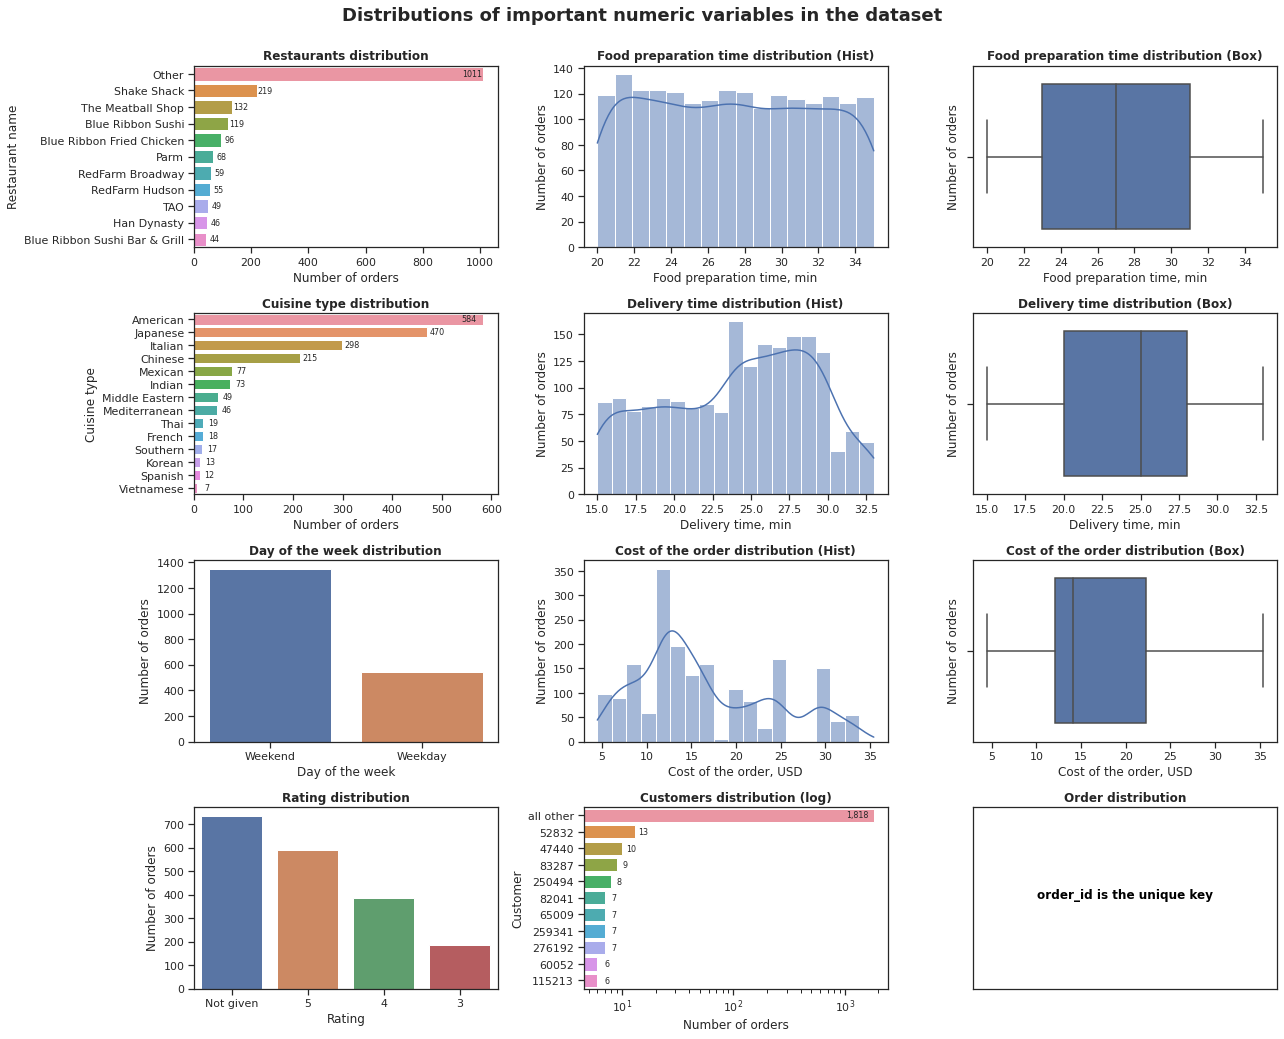

In [13]:
#restaurant_name prep
top10_restaurants = list(df['restaurant_name'].value_counts()[:10].index)
df["restaurant_name_eda"] = df["restaurant_name"].apply(lambda x: x if x in top10_restaurants else 'Other')

#customer_id prep
top10_customers = list(df['customer_id'].value_counts()[:10].index)
df["customer_id_eda"]  = df["customer_id"].apply(lambda x: x if x in top10_customers else 'all other')

sns.set(style='ticks')
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(18,14))
fig.suptitle('Distributions of important numeric variables in the dataset', fontweight='bold', y=1.03, fontsize=18);

#restaurant_name
sns.countplot(data=df, y='restaurant_name_eda', ax=ax[0,0], order = df['restaurant_name_eda'].value_counts().index);
ax[0,0].set_title('Restaurants distribution', fontweight='bold')
ax[0,0].set_xlabel('Number of orders')
ax[0,0].set_ylabel('Restaurant name')

lbl = df['restaurant_name_eda'].value_counts()
for i, p in enumerate(ax[0,0].patches):
    h, w, x, y = p.get_height(), p.get_width(), p.get_x(), p.get_y()
    xy = (w + (-40 if i == 0 else 30), y + h / 2)
    ax[0,0].annotate(s=f'{lbl.iloc[i]}', xy=xy, ha='center', va='center', fontsize=8)

#food_preparation_time - hist
sns.histplot(data=df, x='food_preparation_time', ax=ax[0,1], kde=True, bins=16);
ax[0,1].set_title('Food preparation time distribution (Hist)', fontweight='bold')
ax[0,1].set_xlabel('Food preparation time, min')
ax[0,1].set_ylabel('Number of orders')

#food_preparation_time - box
sns.boxplot(data=df, x='food_preparation_time', ax=ax[0,2]);
ax[0,2].set_title('Food preparation time distribution (Box)', fontweight='bold')
ax[0,2].set_xlabel('Food preparation time, min')
ax[0,2].set_ylabel('Number of orders')

#cuisine_type
splot = sns.countplot(data=df, y='cuisine_type', ax=ax[1,0], order = df['cuisine_type'].value_counts().index);
ax[1,0].set_title('Сuisine type distribution', fontweight='bold')
ax[1,0].set_xlabel('Number of orders')
ax[1,0].set_ylabel('Сuisine type')

lbl = df['cuisine_type'].value_counts()
for i, p in enumerate(ax[1,0].patches):
    h, w, x, y = p.get_height(), p.get_width(), p.get_x(), p.get_y()
    xy = (w + (-30 if i == 0 else 20), y + h / 2)
    ax[1,0].annotate(s=f'{lbl.iloc[i]}', xy=xy, ha='center', va='center', fontsize=8)

#delivery_time - hist
sns.histplot(data=df, x='delivery_time', ax=ax[1,1], kde=True, bins=19);
ax[1,1].set_title('Delivery time distribution (Hist)', fontweight='bold')
ax[1,1].set_xlabel('Delivery time, min')
ax[1,1].set_ylabel('Number of orders')

#delivery_time -  box
sns.boxplot(data=df, x='delivery_time', ax=ax[1,2]);
ax[1,2].set_title('Delivery time distribution (Box)', fontweight='bold')
ax[1,2].set_xlabel('Delivery time, min')
ax[1,2].set_ylabel('Number of orders')

#day_of_the_week
sns.countplot(data=df, x='day_of_the_week', ax=ax[2,0]);
ax[2,0].set_title('Day of the week distribution', fontweight='bold')
ax[2,0].set_xlabel('Day of the week')
ax[2,0].set_ylabel('Number of orders')

#cost_of_the_order - hist
sns.histplot(data=df, x='cost_of_the_order', ax=ax[2,1], kde=True);
ax[2,1].set_title('Cost of the order distribution (Hist)', fontweight='bold')
ax[2,1].set_xlabel('Cost of the order, USD')
ax[2,1].set_ylabel('Number of orders')

#cost_of_the_order - box
sns.boxplot(data=df, x='cost_of_the_order', ax=ax[2,2]);
ax[2,2].set_title('Cost of the order distribution (Box)', fontweight='bold')
ax[2,2].set_xlabel('Cost of the order, USD')
ax[2,2].set_ylabel('Number of orders')

#rating
# It seems we need 'return' the 'Not given' category to draw a countplot
sns.countplot(data=df, x='rating', ax=ax[3,0], order = df['rating'].value_counts().index);
ax[3,0].set_title('Rating distribution', fontweight='bold')
ax[3,0].set_xlabel('Rating')
ax[3,0].set_ylabel('Number of orders')

#customer
sns.countplot(data=df, y='customer_id_eda', ax=ax[3,1], order = df['customer_id_eda'].value_counts().index);
ax[3,1].set(xscale="log")
ax[3,1].set_title('Customers distribution (log)', fontweight='bold')
ax[3,1].set_xlabel('Number of orders')
ax[3,1].set_ylabel('Customer')

lbl = df['customer_id_eda'].value_counts()
for i, p in enumerate(ax[3,1].patches):
    h, w, x, y = p.get_height(), p.get_width(), p.get_x(), p.get_y()
    xy = (w + (-800 if i == 0 else 1), y + h / 2)
    ax[3,1].annotate(s=f'{lbl.iloc[i]:,.0f}', xy=xy, ha='left', va='center', fontsize=8)

#off
ax[3, 2].tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
ax[3, 2].set_title('Order distribution', fontweight='bold')

if df[(df['order_id'].value_counts()!=1).values].shape[0] == 0:
  ax[3, 2].text(0.5, 0.5, "order_id is the unique key", horizontalalignment='center', size='medium', color='black', weight='semibold')
else:
  ax[3, 2].text(0.5, 0.5, "order_id duplicates detected", horizontalalignment='center', size='medium', color='black', weight='semibold')

fig.tight_layout()

There are 1200 unique customers in the dataset.
There are 178 unique restaurants in the dataset.
There are 14 unique cuisine types in the dataset.
There are 1351 orders placed on weekend.

**************************************************



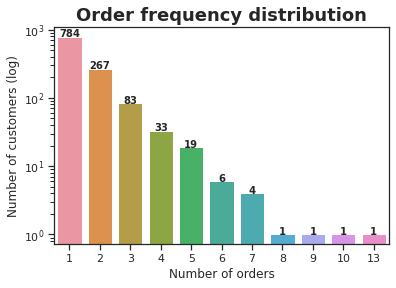

In [14]:
# Order frequency distribution

print(f"There are {df['customer_id'].nunique()} unique customers in the dataset.")
print(f"There are {df['restaurant_name'].nunique()} unique restaurants in the dataset.")
print(f"There are {df['cuisine_type'].nunique()} unique cuisine types in the dataset.")
print(f"There are {(df['day_of_the_week']=='Weekend').sum()} orders placed on weekend.")

print('\n' + '*'*50 + '\n')

freq = df['customer_id'].value_counts().value_counts()

fig, ax = plt.subplots(figsize=(6, 4))
ax.set(yscale="log")
sns.barplot(x=list(freq.index), y=freq.values, ax=ax)
ax.set_title('Order frequency distribution', fontweight='bold', fontsize=18)
ax.set_xlabel('Number of orders')
ax.set_ylabel('Number of customers (log)')

for i, p in enumerate(ax.patches):
    h, w, x, y = p.get_height(), p.get_width(), p.get_x(), p.get_y()
    xy = (w + x - 0.4, y + h + h/10)
    ax.annotate(s=f'{freq.values[i]}', xy=xy, ha='center', va='center', fontsize=10, fontweight='bold')

#### Observations:

<code>order_id</code>
* No need to explore order_id as it is unique order key

<code>customer_id</code>
* There are 1200 unique customers in the dataset.
* Most of the customers (65%) placed only one order. 22% of the customers placed two orders.
* Customer 52832 placed 13 orders - more than other customers.
* Only 33 customers placed five and more orders

<code>restaurant_name</code>
* There are 178 restaurants in the dataset. 47% of orders were delivered from the most popular ten restaurants.
* The most popular restaurant by order count is 'Shake Shack' with 219 orders (11.5%)

<code>cuisine_type</code>
* American is the most popular cuisine (584 orders, ~31%). Japanese and Italian cuisines are on the 2<sup>nd</sup> and 3<sup>rd</sup> places of the top.
* Vietnamese cuisine ends the list as the less popular cuisine with 7 orders (0.4%).

<code>cost_of_the_order</code>
* Distribution is right-skewed. Median is \$14.14.
* It has trimodal distribution. We can assume three categories or three price levels: \$5-17, \$20-25, and \$30-35.

<code>day_of_the_week</code>
* The dataset represents 71% of orders placed on weekends and 29% on weekdays.

<code>rating</code>
* Almost 39% of orders were not rated. Among the rated orders the average rating is 4.34. More than half of the rated orders have the maximum rate (5).

<code>food_preparation_time</code>
* Food preparation time distribution is close to uniform distribution. 
* Food preparation time range is from 20 to 35 mins.
* Each value of cooking time has an equal probability of 6.25%. Median is 27 minutes, mean ~27 mins.
* The preparation time seems longer than it should be. The orders for delivery have low priority compared with the in-house orders.

<code>delivery_time</code>
* Distribution of Delivery time is left-skewed. Median is 25 mins, mean is ~24 mins. 
* Most orders (52%) take 24-30 mins to be delivered, 8% take 31-33 mins, 40% - 15-23 mins.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [15]:
print(f'The top 5 restaurants in terms of the number of orders received are: {list(df["restaurant_name"].value_counts()[:5].index)}\n')

df["restaurant_name"].value_counts()[:5]

The top 5 restaurants in terms of the number of orders received are: ['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm']



Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

* The top 5 restaurants in terms of the number of orders received are: 
  1. Shake Shack
  2. The Meatball Shop
  3. Blue Ribbon Sushi
  4. Blue Ribbon Fried Chicken
  5. Parm

* The top 5 restaurants make up 33% of total orders.
* Shake Shack, the top restaurant had 219 orders (11.5% of total orders).

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [16]:
from locale import normalize
print(f'The most popular cuisine on weekends is {df[df["day_of_the_week"]=="Weekend"].value_counts("cuisine_type").index[0]}\n')
df[df["day_of_the_week"]=="Weekend"].value_counts("cuisine_type", normalize=True)[:5]

The most popular cuisine on weekends is American



cuisine_type
American    0.307180
Japanese    0.247964
Italian     0.153220
Chinese     0.120651
Mexican     0.039230
dtype: float64

#### Observations:

* The most popular cuisine on weekends is American. These orders make up 31% of all orders placed on weekends.
* Weekends are the most popular time to place orders.
* Cuisine type preferences have weak relationships with the day of the week when orders are placed.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [17]:
# Percentage of the orders cost more than 20 dollars

print(f'{df[df["cost_of_the_order"]>20].shape[0] / df.shape[0]:.2%} of the orders cost more than 20 dollars.')

29.24% of the orders cost more than 20 dollars.


#### Observations:

29% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [18]:
# The mean order delivery time

print(f'The mean order delivery time is {df["delivery_time"].mean():.2f} mins')

The mean order delivery time is 24.16 mins


#### Observations:

* The mean order delivery time is about 24 mins. This is slightly lower than the median time (25 mins)
* Most orders (52%) take 24-30 mins to be delivered, 8% take 31-33 mins, 40% - 15-23 mins

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [19]:
df['customer_id'].value_counts()[:3]

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

In [20]:
print(f"The 3 most frequent customers contribute {df[df['customer_id'].isin(df['customer_id'].value_counts()[:3].index)]['cost_of_the_order'].sum() / df['cost_of_the_order'].sum():.1%} of total revenue")


The 3 most frequent customers contribute 1.7% of total revenue


#### Observations:

Top-3 customers and the number of orders they placed:

|  ID   | Orders |
|-------|--------:|
| 52832 |    13  |
| 47440 |    10  |
| 83287 |     9  |


* The three most frequent customers (0.25% of the customer base) contribute 1.7% of total revenue
* Most of the customers (65%) placed only one order. 22% of the customers placed two orders.
* Only 33 customers placed five and more orders
* What is the purpose of the award (vouchers)? The loyalty programs need to be analyzed in more detail.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


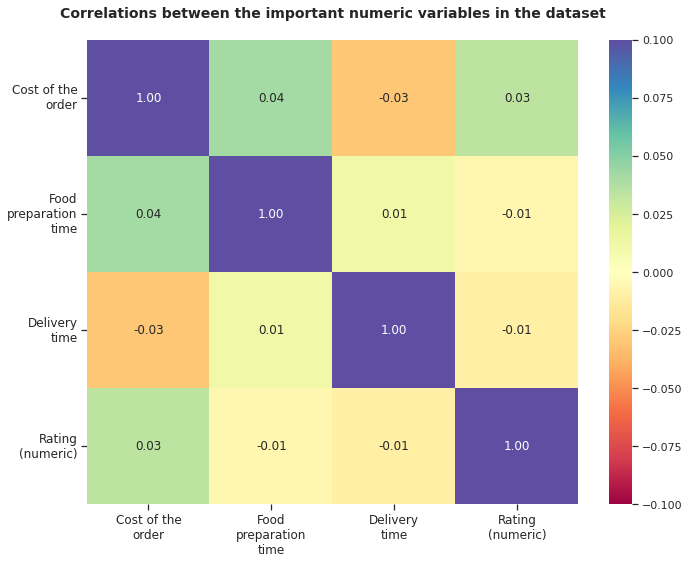

In [21]:
# Columns description
vars = {'order_id': 'Order ID', 
             'customer_id': 'Customer ID',
             'restaurant_name': 'Restaurant name',
             'cuisine_type': 'Cuisine type',
             'cost_of_the_order': 'Cost of the order',
             'day_of_the_week': 'Day of the week',
             'rating': 'Rating (category)',
             'food_preparation_time': 'Food preparation time',
             'delivery_time': 'Delivery time',
             'restaurant_name_eda': 'Restaurant name',
             'frating': 'Rating (numeric)'}

# Check for correlation among numerical variables
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data=df.select_dtypes(np.number).corr(), annot=True, cmap='Spectral', vmin=-0.1, vmax=0.1, ax=ax, fmt=".2f")
ax.set_title('Correlations between the important numeric variables in the dataset\n', fontweight='bold', fontsize=14);
ax.set_xticklabels([textwrap.fill(vars[t.get_text()], 12) for t in ax.get_xticklabels()], fontsize=12, rotation = 0)
ax.set_yticklabels([textwrap.fill(vars[t.get_text()], 12) for t in ax.get_yticklabels()], fontsize=12)
plt.tight_layout()
plt.show();

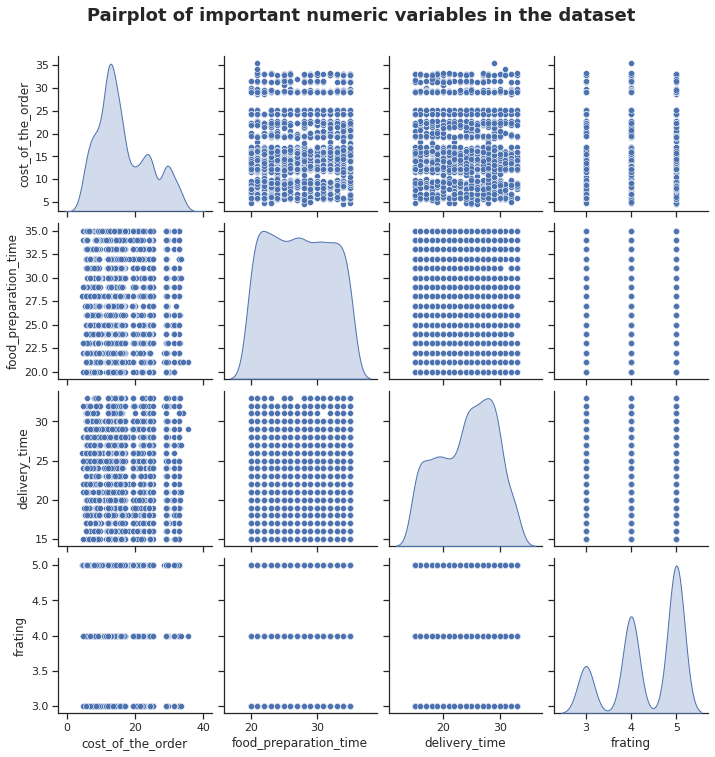

In [22]:
# Pairplot of important numeric variables in the dataset

sns.pairplot(data=df.select_dtypes(np.number), diag_kind='kde')\
  .fig.suptitle('Pairplot of important numeric variables in the dataset', fontweight='bold', y=1.05, fontsize=18);

plt.show();


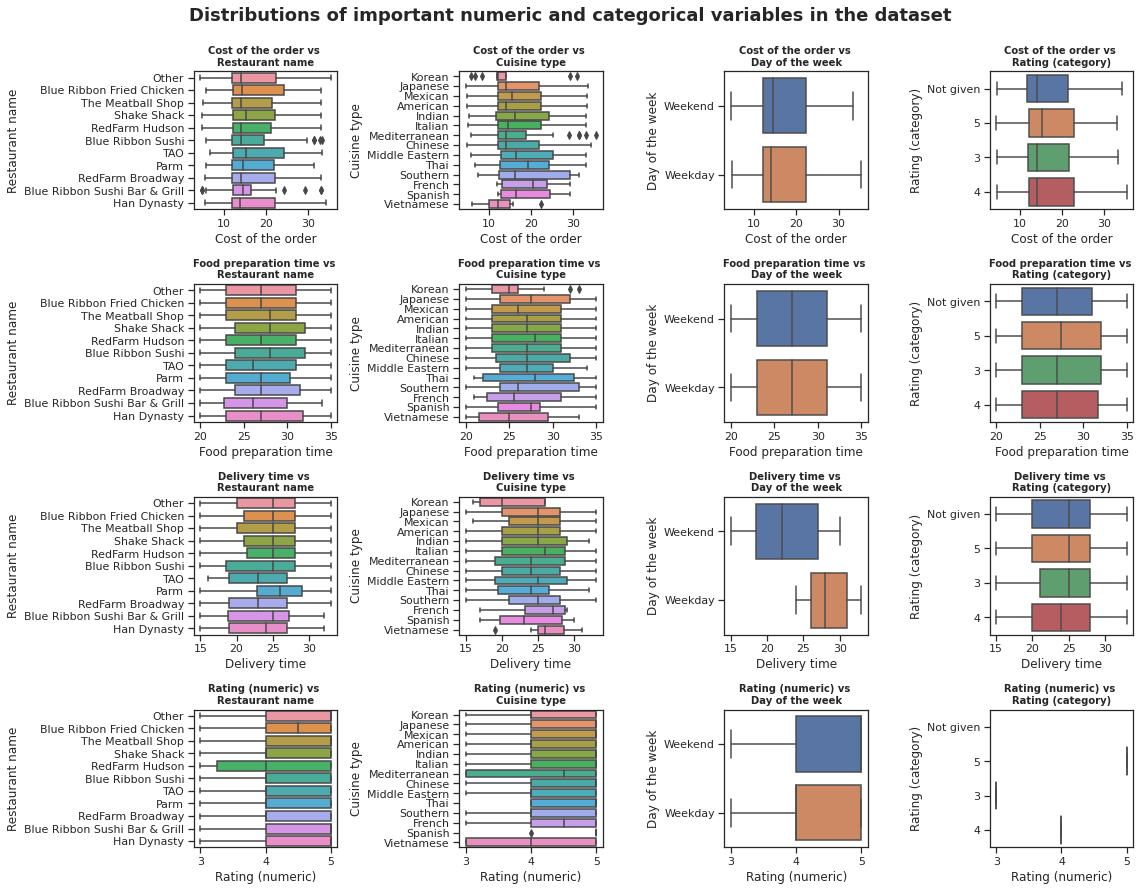

In [23]:
# Distributions of important numeric and categorical variables in the dataset

nums = df.select_dtypes(np.number).columns
cats = ['restaurant_name_eda', 'cuisine_type', 'day_of_the_week', 'rating']

fig, ax = plt.subplots(nrows=len(nums), ncols=len(cats), figsize=(16,12))
fig.suptitle('Distributions of important numeric and categorical variables in the dataset', fontweight='bold', y=1.03, fontsize=18);

for i, col in enumerate(nums):
  for j, row in enumerate(cats):
    sns.boxplot(x=df[col], y=df[row], ax=ax[i, j])
    ax[i,j].set_title(vars[col] + ' vs \n' + vars[row], fontweight='bold', fontsize=10)
    ax[i,j].set_xlabel(vars[col])
    ax[i,j].set_ylabel(vars[row])

plt.tight_layout()
plt.show();


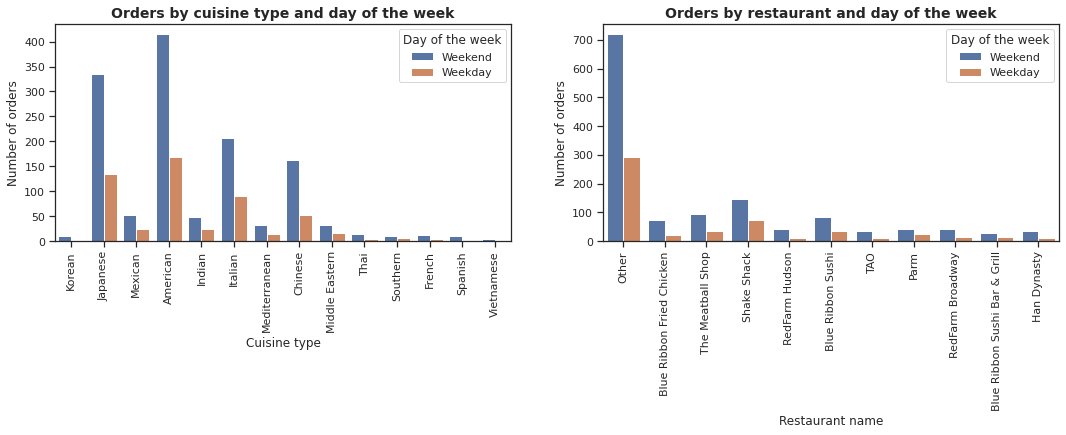

In [24]:
# Distribution of number of orders by cuisine type / restaurant name by day of the week

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18, 4))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week', ax=ax[0], dodge=True);
ax[0].set_title('Orders by cuisine type and day of the week', fontweight='bold', fontsize=14)
ax[0].set_xlabel('Cuisine type')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
ax[0].set_ylabel('Number of orders')
ax[0].legend(title='Day of the week');

sns.countplot(data=df, x='restaurant_name_eda', hue='day_of_the_week', ax=ax[1], dodge=True);
ax[1].set_title('Orders by restaurant and day of the week', fontweight='bold', fontsize=14)
ax[1].set_xlabel('Restaurant name')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
ax[1].set_ylabel('Number of orders')
ax[1].legend(title='Day of the week');


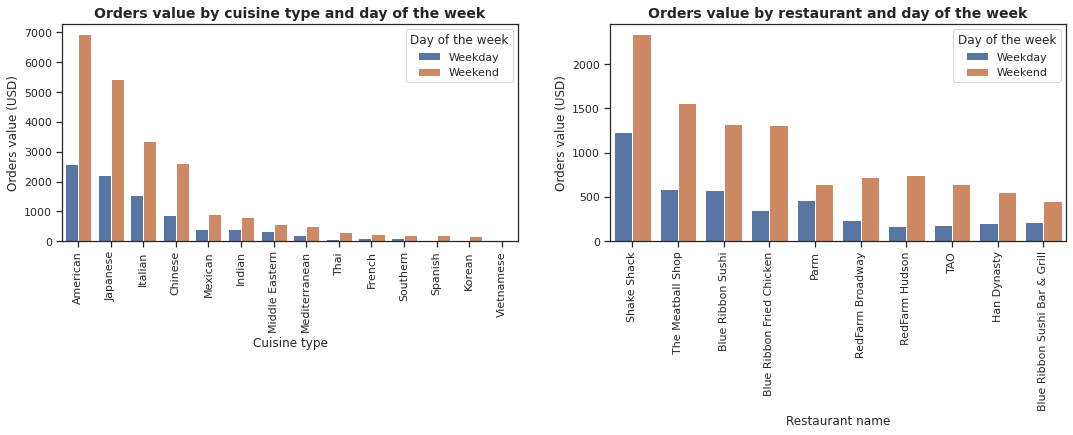

In [25]:
# Orders value by cuisine type / restaurant name by day of the week

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18, 4))

rev_cui = df.groupby(['cuisine_type', 'day_of_the_week'])['cost_of_the_order'].sum().reset_index()
sns.barplot(data=rev_cui, x='cuisine_type', y='cost_of_the_order', hue='day_of_the_week', ax=ax[0], order=rev_cui.groupby('cuisine_type').sum().sort_values(by='cost_of_the_order')[::-1].index);
ax[0].set_title('Orders value by cuisine type and day of the week', fontweight='bold', fontsize=14)
ax[0].set_xlabel('Cuisine type')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
ax[0].set_ylabel('Orders value (USD)')
ax[0].legend(title='Day of the week');

rev_res = df[df['restaurant_name_eda']!='Other'].groupby(['restaurant_name_eda', 'day_of_the_week'])['cost_of_the_order'].sum().reset_index()
sns.barplot(data=rev_res, x='restaurant_name_eda', y='cost_of_the_order', hue='day_of_the_week', ax=ax[1], order=rev_res.groupby('restaurant_name_eda').sum().sort_values(by='cost_of_the_order')[::-1].index);
ax[1].set_title('Orders value by restaurant and day of the week', fontweight='bold', fontsize=14)
ax[1].set_xlabel('Restaurant name')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
ax[1].set_ylabel('Orders value (USD)')
ax[1].legend(title='Day of the week');

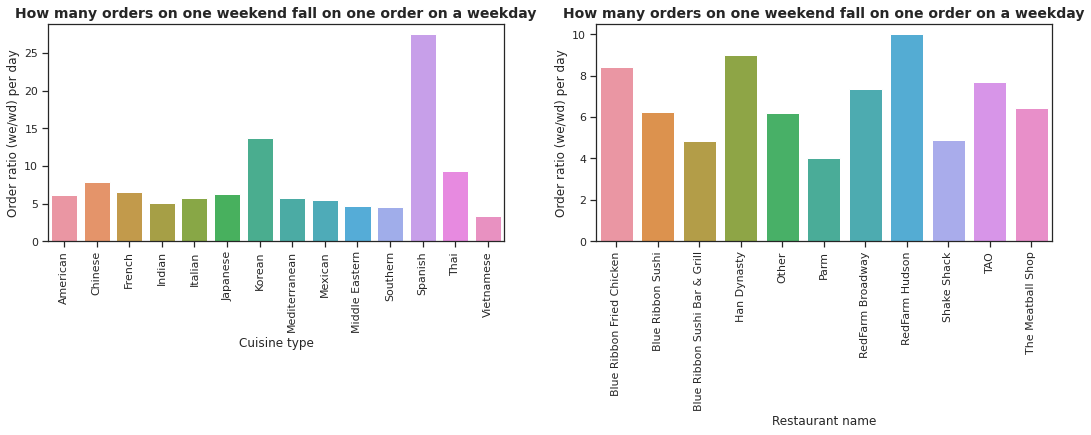

In [26]:
# Distribution of number of orders by cuisine type / restaurant name by day of the week (adjusted by # of days)

df1 = df.pivot_table(index='cuisine_type', columns='day_of_the_week', values='order_id', aggfunc='count')
df1['coef'] = (df1['Weekend'] / 2) / (df1['Weekday'] / 5)

df2 = df.pivot_table(index='restaurant_name_eda', columns='day_of_the_week', values='order_id', aggfunc='count')
df2['coef'] = (df2['Weekend'] / 2) / (df2['Weekday'] / 5)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(18, 4))

sns.barplot(data=df1, x=df1.index, y='coef', ax=ax[0])
ax[0].set_title('How many orders on one weekend fall on one order on a weekday', fontweight='bold', fontsize=14)
ax[0].set_xlabel('Cuisine type')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
ax[0].set_ylabel('Order ratio (we/wd) per day')

sns.barplot(data=df2, x=df2.index, y='coef', ax=ax[1])
ax[1].set_title('How many orders on one weekend fall on one order on a weekday', fontweight='bold', fontsize=14)
ax[1].set_xlabel('Restaurant name')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
ax[1].set_ylabel('Order ratio (we/wd) per day');


In [27]:
restaurant_cuisine = df[['restaurant_name', 'cuisine_type']].drop_duplicates()
milti_cuisine = restaurant_cuisine.value_counts('restaurant_name')
mlist = milti_cuisine[milti_cuisine > 1].index

print('Nulti-cuisines restaurants:')
for r in mlist:
    print(f'    Restaurant: {r} - Cuisines: {restaurant_cuisine.loc[restaurant_cuisine["restaurant_name"]==i, "cuisine_type"].values}')


Nulti-cuisines restaurants:
    Restaurant: The Meatball Shop - Cuisines: []


#### Observations:

* No correlations (very weak correlation) between the important numeric variables in the dataset (all correlation coefficents are between -0.03 and +0.04)
* In pairplot we get the same insights as from the correlation plot. There does not seem to be a relationship between numerical variables
* The only one restaurant 'The Meatball Shop' offered more than one type of cousines: Italian and American

* Cost vs. cuisine type:
  * Median costs of Vietnamese and Korean cuisines are lower than others
  * Median costs of French and Thai cuisines are the more expensive than others
  * Mediterranean restaurants are the most expensive in average due to several outluer restaurants
  * The most popular cuisines have very similar price distributions ($15-25).

* Preparation time vs. Cuisine types 
  * Most cuisine types have a similar preparation time (24-32 mins).
  * Asian cuisine restaurants differ from the others in the food preparation time and have different ranges of preparation time
  * The range of preparation time for Vietnamese, Korean, and Spanish cuisine is less than for others, but the number of orders and the revenues from these categories are also tiny.

* Delivery time vs. Day of the week
  * The delivery time range on weekends is wider than on weekdays.
  * Delivery time takes longer during the weekdays than during the weekends. The mean delivery time for weekends is ~22 mins, and for the weekdays is ~28 mins. Perhaps this depends on the traffic.

* Rating vs. Total time
  * There is no relationship between the ratings provided and the total time it took for customers to receive their orders

* Number of orders is significantly lower in the weekdays than in weekends.

* Revenues collected on weekends are times higher than on weekdays for the same cuisine or restaurants 

* In average on one weekday order fall 8 orders on a weekend day. However this proportion is not the same for each cuisine. The customers consume Spanish cuisine mostly in weekend 27:1 orders. Thai and Korean cuisines are also more popular on weekends.

* The clients of 'RedFarm Hudson' order in weekend 10 times more in weekend (based on a day basis). 'Han Dynasty': 9:1, 'Blue Ribbon Fried Chicken': 8:1.



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [28]:
promo = df.groupby('restaurant_name').agg({'frating': ['mean', 'count']}).fillna(0).reset_index()
promo.columns = [promo.columns[0][0]] + [c[0]+'_'+c[1] for c in promo.columns[1:]]
promo[(promo['frating_count']>50) & (promo['frating_mean']>4)].sort_values(by='frating_mean', ascending=False)


restaurant_name  frating_mean  frating_count
153          The Meatball Shop      4.511905             84
20   Blue Ribbon Fried Chicken      4.328125             64
136                Shake Shack      4.278195            133
21           Blue Ribbon Sushi      4.219178             73

#### Observations:

There are four restaurants fulfilling the criteria to get the promotional offer:

| Restaurant name | Rating mean | Rating count |
|-----------------|--------------:|---------------:|
| The Meatball Shop | 4.51 | 84 |
| Blue Ribbon Fried Chicken	| 4.33 | 64 |
| Shake Shack | 4.28 | 133 |
| Blue Ribbon Sushi	| 4.22 | 73 |



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [29]:
def comm(cost):
  if cost > 20.0: return(round(0.25*cost, 2))
  elif cost > 5.0: return(round(0.15*cost, 2))
  else: return(0)

df['commission'] = df['cost_of_the_order'].apply(comm)

print(f'The total orders value is ${df["cost_of_the_order"].sum():,.2f}')
print(f'The net revenue generated by the company across all orders is ${df["commission"].sum():,.2f} ({df["commission"].sum()/df["cost_of_the_order"].sum():.1%})')

The total orders value is $31,314.82
The net revenue generated by the company across all orders is $6,166.50 (19.7%)


#### Observations:

* The total orders value is \$31,314.82
* The net revenue generated by the company across all orders is \$6,166.50
* The average commission is 19.7%


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [30]:
df['total_order_time'] = df['food_preparation_time'] + df['delivery_time']

print(f'{df[df["total_order_time"]>60].shape[0] / df.shape[0]:.0%} of orders take more than 60 minutes to get delivered from the time the order is placed.')

11% of orders take more than 60 minutes to get delivered from the time the order is placed.


#### Observations:

* 11% of orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [31]:
df.groupby('day_of_the_week').mean()["delivery_time"]

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:

* Averege delivery time during weekdays is ~28 mins, on weekends is ~22 mins.
* Averege delivery time during weekends is ~6 mins faster than on weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

* The provided dataset has nine columns listed in the Data Dictionary.
* The dataset contains 1898 rows. Data in each row corresponds to the order placed by a customer.
* There are no missed data and no duplicate rows in the dataset. There are no significant differences between the minimum and the maximum value for the numeric columns. Data look consistent.

* Average cost of the order is \$16.50, median is \$14.14. Distribution is right-skewed. It has trimodal distribution. We can assume three categories or three price levels/segments: 
  * “Students”: \$5-17.  The largest segment (66% of orders), average order \$11. 32% of the revenue
  * “Middle Group”: \$20-25. The mid-segment (21% of orders), average order \$23. 36% of the revenue
  * “Busy profs”: \$30-35. The smallest segment (13% of orders), average order \$32. 32% of the revenue
  * No orders over \$35. It might be the dataset restrictions for the study case.

All three segments contribute approximately the same share of the revenue.

* General Statistics:
  * There are 1200 unique customers in the dataset.
  * There are 178 unique restaurants in the dataset. The top 5 restaurants made up 33% of the orders
  * There are 14 unique cuisine types in the dataset. The top 5 cuisines made up 87% of the orders
  * There are 1351 orders placed on weekends.

  * The total orders value is \$31,314.82
  * The net revenue generated by the company across all orders is \$6,166.50
  * The average commission is 19.7%
  * Average revenue per order is \$3.25. It’s not enough to cover the delivery cost.

* Preparation time:
  * Preparation time average is 27.37 minutes
  * The preparation time seems longer than it should be. The orders for delivery have low priority compared with the in-house orders.

* Delivery time:
  * Average Delivery time is 24.16 minutes: 28.34 mins on the weekday, 22.47 mins on the weekends

* Rating
  * Most of the orders were not rated. The average rating of the rated orders is 4.34. Half or even more rated orders have the highest rating

### Recommendations

* Delivery
  * The average revenue per order is $3.25. It’s not enough to cover the delivery cost. Assume that delivery is a separate charge and not included in the case
  * The average delivery time is 24 mins. One delivery person can deliver up to 10 orders per 8-hour working shift (including time to return to the starting point).
  * Considering that the delivery charge is something that FoodHub can control, there is an opportunity to apply differentiated approaches to different segments and also:
    * Improve food delivery on weekends by offering a discount for those who placed orders on weekdays of the current week
    * Offer a service subscription fee instead of fixed delivery fees.

* Variety of restaurants
  * 178 restaurants available for delivery might be a weakness, as it might be a reason for an increased average delivery time, turnover, etc. 
* Considering that there were only three or fewer orders from some distant (highest delivery time on the weekend) restaurants.
  * Decreasing the number of available restaurants may also enable the delivery of multiple orders at once by one delivery person.

* Food Preparation time:
  * The preparation time seems longer than it should be. The reason might be that the orders for delivery have low priority compared with the in-house orders.
  * To motivate restaurants to process FoodHub orders with higher priority, suggest a differentiated or discounted fee for certain restaurants if the food preparation time is less than a threshold.

* Segmentation
  * There are three segments of orders (customers). It is essential to develop different marketing initiatives for each segment individually

* Ratings
  * Encourage customers to rate orders

---

In [33]:
#%%shell

#jupyter nbconvert --to html /content/project_1_at.ipynb